In [18]:
#Packages utiles

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
##### Partie 1 : Mise en forme du dataset #####

In [19]:
#Exploration des fichiers csv : 40 features et le rendement mensuel pour 254 stocks à 272 dates

info =  pd.read_csv("./info_charact.csv",index_col=0)
info.head()

,“Name”
“ID”,
1,size
2,valueAnnual
4,piotroski
5,debtIssue
6,shareIssue


In [25]:
#Création d'un dataframe où chaque ligne représente un stock à une certaine date et en colonne la valeur correspondante des features et du rendement mensuel
#Division du dataframe en 3 sets en maintenant l'ordre temporel des données (rapport 3/5, 1/5 et 1/5) : training, validation et test set

tab_vf_train = pd.DataFrame(columns=info['“Name”'])
tab_vf_test=pd.DataFrame(columns=info['“Name”'])
tab_vf_val=pd.DataFrame(columns=info['“Name”'])

for ind in info.index:
    predic = info['“Name”'][ind]
    tab =  pd.read_csv(f"./{ind}.csv",index_col=0)
    col = tab[tab.columns[0]]
    length = len(tab)
    col_train=col.iloc[:(3*length)//5]
    col_test=col.iloc[(3*length)//5 + 1:(4*length)//5]
    col_val=col.iloc[(4*length)//5 + 1:]
    for column in tab.columns[1:]:
        tab1=tab[column]
        length=len(tab1)
        col_train = col_train.append(tab1.iloc[:(3*length)//5])
        col_test = col_test.append(tab1.iloc[(3*length)//5 + 1:(4*length)//5])   
        col_val = col_val.append(tab1.iloc[(4*length)//5 + 1:])
    tab_vf_train[f'{predic}']=col_train
    tab_vf_test[f'{predic}']=col_test
    tab_vf_val[f'{predic}']=col_val

print(f"Taille du training set :{tab_vf_train.shape}")
print(f"Taille du validation set :{tab_vf_val.shape}")
print(f"Taille du test set :{tab_vf_test.shape}")

tab_vf_train.head()

Taille du training set :(41402, 41)
Taille du validation set :(13716, 41)
Taille du test set :(13462, 41)


“Name”,size,valueAnnual,piotroski,debtIssue,shareIssue,assetGrowth,assetTurnover,divYld,earningsToPrice,cashFlowToMarket,...,beta,seasonality,indRelativeReversal,indMomRev,compositeIssuance,price,firmAge,shareVol,benchmarkWeight,returns_monthly
1999-12-31,-0.361507,-0.034591,0.414847,-0.259557,0.228601,0.288913,0.190722,0.092133,0.39234,0.292961,...,0.280911,-0.441650,0.348790,0.359155,-0.380734,0.314050,0.262626,-0.332990,0.002936,0.024199
2000-01-31,-0.361507,-0.034591,0.401302,-0.259557,0.228601,0.288913,0.190722,0.092133,0.39234,0.292961,...,0.276573,0.069416,-0.292339,-0.029175,-0.225400,0.299172,0.262626,-0.335052,0.002936,-0.043422
2000-02-29,-0.361507,-0.034591,0.483766,-0.259557,0.228601,0.288913,0.190722,0.092133,0.39234,0.292961,...,0.251082,0.061368,0.171371,0.299799,-0.338269,0.280538,0.262626,-0.308247,0.002751,-0.052159
2000-03-31,-0.361507,-0.034591,0.383369,-0.260040,0.228601,0.288913,0.190722,0.092133,0.39234,0.292961,...,0.242424,-0.176707,0.421529,0.441767,-0.365909,0.235537,0.263105,-0.275720,0.002537,0.004252
2000-04-30,-0.361507,-0.034591,0.384199,-0.261000,0.228601,0.288913,0.191358,0.092133,0.39234,0.292961,...,0.249460,0.296000,0.217435,0.336000,-0.321267,0.222222,0.264056,-0.239754,0.002560,-0.021877


In [26]:
#On remplace les NaN par la valeur à la date précédente, on supprime s'il n'y en a pas

tab_vf_train.replace(0, np.nan, inplace=True)
tab_vf_test.replace(0, np.nan, inplace=True)
tab_vf_val.replace(0, np.nan, inplace=True)

tab_vf_train = tab_vf_train.fillna(method='ffill')
tab_vf_test = tab_vf_test.fillna(method='ffill')
tab_vf_val = tab_vf_val.fillna(method='ffill')

tab_vf_train.dropna(inplace = True)
tab_vf_val.dropna(inplace = True)
tab_vf_test.dropna(inplace = True)

In [92]:
#On divise chaque dataframe en la colonne des rendements mensuels et les features

y_train = tab_vf_train['returns_monthly']
y_train.head()

y_test = tab_vf_test['returns_monthly']
y_test.head()

y_val = tab_vf_val['returns_monthly']
y_val.head()

X_train = tab_vf_train.drop('returns_monthly', axis=1)
X_train.reset_index(drop=True, inplace=True)
X_train.columns.names = ['']
X_train.head()

X_test = tab_vf_test.drop('returns_monthly', axis=1)
X_test.reset_index(drop=True, inplace=True)
X_test.columns.names = ['']
X_test.head()

X_val = tab_vf_val.drop('returns_monthly', axis=1)
X_val.reset_index(drop=True, inplace=True)
X_val.columns.names = ['']
X_val.head()

,size,valueAnnual,piotroski,debtIssue,shareIssue,assetGrowth,assetTurnover,divYld,earningsToPrice,cashFlowToMarket,...,idioVol,beta,seasonality,indRelativeReversal,indMomRev,compositeIssuance,price,firmAge,shareVol,benchmarkWeight
0,-0.441176,-0.330619,-0.081549,-0.281300,0.159054,0.058140,0.258278,0.023962,0.067093,-0.065495,...,0.454041,0.031915,0.298732,-0.181458,-0.425515,-0.358120,0.426984,0.345483,-0.444532,0.005803
1,-0.441083,-0.330343,-0.104613,-0.280952,0.158497,0.059068,0.257877,0.024800,0.069600,-0.063200,...,0.446032,-0.098361,-0.103175,0.231746,-0.230159,-0.273973,0.415739,0.345238,-0.417460,0.005541
2,-0.441176,-0.330619,-0.342928,-0.281300,0.159054,0.059801,0.258278,0.025559,0.068690,-0.063898,...,0.189382,-0.233224,-0.146593,0.436609,-0.018225,-0.231624,0.393651,0.345483,-0.403328,0.004888
3,-0.441176,-0.330619,-0.357143,-0.281300,0.159054,0.059801,0.258278,0.025559,0.068690,-0.063898,...,0.229002,-0.233224,0.278130,-0.049921,-0.389065,-0.348382,0.388889,0.345483,-0.360539,0.004854
4,-0.429825,-0.382258,-0.363636,-0.283094,0.038710,0.064489,0.260000,0.031300,0.068218,-0.065008,...,0.195375,-0.236928,0.048644,-0.155502,-0.433014,-0.329932,0.393142,0.344498,-0.335726,0.004831


In [28]:
#Calcul du coefficient de détermination "without demeaning"

def coeff_deter(y_pred, y_true):
    return 1-(np.linalg.norm(y_true-y_pred)/np.linalg.norm(y_true))**2

In [ ]:
##### Partie 2 : Prédiction du rendement avec des méthodes de machine learning #####

In [30]:
#OLS

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(f"R2 = {reg.score(X_val, y_val)}")

y_pred=reg.predict(X_val)
print(f"R2 without demeaning = {coeff_deter(y_pred, y_val)}")

#Le coefficient de détermination without demeaning est légèrement supérieur au coefficient R2 classique comme prévu par le papier

R2 = 0.24725998097335233
R2 without demeaning = 0.25605794723716824


Max leaf nodes is 2 and the Coeff is 0.15170770644238463
Max leaf nodes is 3 and the Coeff is 0.18546170801276674
Max leaf nodes is 4 and the Coeff is 0.2048883487657508
Max leaf nodes is 5 and the Coeff is 0.21851598574720987
Max leaf nodes is 6 and the Coeff is 0.22788896094627753
Max leaf nodes is 7 and the Coeff is 0.21364858748637283
Max leaf nodes is 8 and the Coeff is 0.2251090322658611


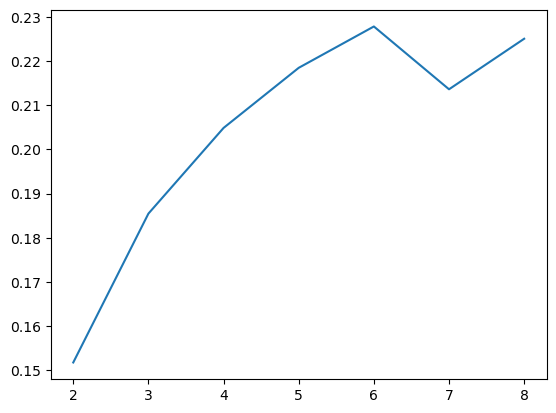

Coeff with max_leaf_nodes = 6 on test set is 0.3496709484702196


In [31]:
#Decision tree

from sklearn.tree import DecisionTreeRegressor

def get_coeff_tree(max_leaf_nodes, X_train, X_val ,y_train,y_val):
    model_tree = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model_tree.fit(X_train, y_train)
    y_pred = model_tree.predict(X_val)
    coeff = coeff_deter(y_pred, y_val)
    return(coeff)

X=[2,3,4,5,6,7,8]
Y=[]

#Optimisation de max_leaf_nodes

for max_leaf_nodes in X:
    my_coeff = get_coeff_tree(max_leaf_nodes,X_train,X_val ,y_train, y_val )
    Y.append(my_coeff)
    print("Max leaf nodes is",max_leaf_nodes,"and the Coeff is", my_coeff)

plt.plot(X, Y)
plt.show()
    
#Best performance obtained for max_leaves_nodes = 6

coeff = get_coeff_tree(6,X_train,X_test ,y_train, y_test)
print("Coeff with max_leaf_nodes = 6 on test set is", coeff)

In [95]:
#Random forest 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

import time

t1=time.time()
model_forest= RandomForestRegressor(random_state=1)
t2=time.time()
print(t2-t1,"s")
model_forest.fit(X_train, y_train)
t3=time.time()
print(t3-t2,"s")
y_pred_forest=model_forest.predict(X_val)
coeff_forest= coeff_deter(y_pred_forest,y_val)
print("Le coefficient est", coeff_forest)

#Optimisation des hyperparamètres avec GridSearch

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=1)
param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(model_forest, param_grid=param_grid, cv=5)
grid_search.fit(X, y)
print("Les coefficients sont", grid_search.best_params_)

model_forest= RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=200, random_state=1)
model_forest.fit(X_train, y_train)
y_pred_forest=model_forest.predict(X_val)
coeff_forest= coeff_deter(y_pred_forest,y_val)
print("Le coefficient après optimisation des hyperparamètres est", coeff_forest)

Le coefficient après optimisation des hyperparamètres est 0.21482690327850595


In [48]:
#Neural networks

from sklearn.neural_network import MLPRegressor

size=[32, 16, 8, 4, 2]

for i in range(1, 6):
    reg = MLPRegressor(hidden_layer_sizes=size[:i], activation='relu',solver='adam', early_stopping=True).fit(X_train, y_train)
    y_pred=reg.predict(X_val)
    coeff = coeff_deter(y_pred, y_val)
    print(f'With {i} hidden layers, coeff = {coeff}')
    
#Si solver='sgd', coeff<=0 : on utilise 'adam'

#Best performance for 1 hidden layer

reg = MLPRegressor(hidden_layer_sizes=[32], activation='relu',solver='adam', early_stopping=True).fit(X_train, y_train)
y_pred=reg.predict(X_test)
coeff = coeff_deter(y_pred, y_test)
print(f'On test set, with 1 hidden layer, coeff = {coeff}')

With 1 hidden layers, coeff = 0.2615350987278977


/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


With 2 hidden layers, coeff = 0.264273912487485


/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


With 3 hidden layers, coeff = 0.249703738944007


KeyboardInterrupt: 

In [ ]:
#PCR

from sklearn.decomposition import PCA

X=range(2, 40)
Y=[]

for K in range(2, 40):
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    reg = LinearRegression().fit(X_train_pca, y_train)
    X_val_pca = pca.transform(X_val)
    y_pred = reg.predict(X_val_pca)
    coeff = coeff_deter(y_pred, y_val)
    Y.append(coeff)
    print(f'For {K} components, coeff = {coeff}')

plt.plot(X, Y)
plt.show()

K_best = 30
  
pca = PCA(n_components=K_best)
X_train_pca = pca.fit_transform(X_train)
reg = LinearRegression().fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test)
y_pred = reg.predict(X_test_pca)
coeff = coeff_deter(y_pred, y_test)
print(f'On test set with K_best={K_best}, coeff = {coeff}')

In [ ]:
#Autres méthodes

from sklearn.ensemble import BaggingRegressor,ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

methods= [BaggingRegressor,ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor]

for method in methods:
    model= method(random_state=1,)
    t2=time.time()
    print("Début de fit pour la méthode",f"{method}")
    model.fit(X_train, y_train)
    t3=time.time()
    print("temps de fit = ",t3-t2,"s")
    y_pred_forest=model.predict(X_val)
    coeff_forest= coeff_deter(y_pred_forest,y_val)
    print("Le coefficient est", coeff_forest)

In [ ]:
##### Partie 3 : Stratégies d'investissement #####

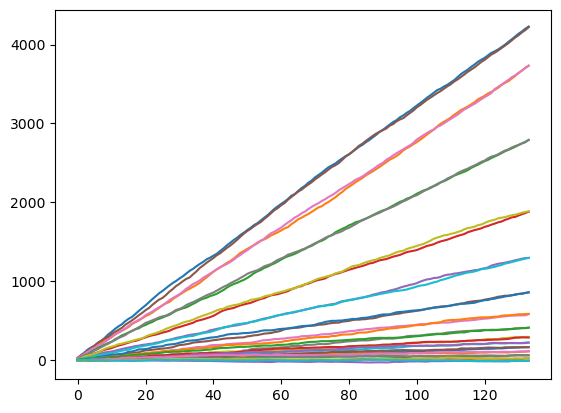

In [94]:
#Première stratégie de trading

modeltest=GradientBoostingRegressor(random_state=1)
modeltest.fit(X_train, y_train)
y_pred=modeltest.predict(X_test)
length=len(y_pred)

def posi(val,thres):
    if val>thres:
        return 10
    elif val<-thres:
        return -10
    else:
        return 0

for thres in np.linspace(0,0.3,15):
    positions=[posi(val,thres) for val in y_pred]
    investedamount=np.sum(np.abs(positions))
    returns=np.multiply(positions, y_test).values - np.ones_like(positions)*0.01
    np.random.shuffle(returns)
    monthlyreturns=[]
    i=0
    while i <=len(positions)-100:
        a=np.sum(returns[i:i+100])
        monthlyreturns.append(a)
        i+=100
    
    cumulreturns=np.cumsum(monthlyreturns)   
    
    plt.plot(cumulreturns)

plt.show()

In [36]:
#Pour le machine learning portfolio, on rajoute deux colonnes pour la date et le nom du stock

size =  pd.read_csv(f"./1.csv",index_col=0)
date = size.index
col = pd.DataFrame(size[size.columns[0]])
col.reset_index(drop=True, inplace=True)
col.set_index([[size.columns[0]]*len(size),date], inplace=True)
col.rename(columns={'2595708':'size'}, inplace=True)

for column in size.columns[1:]:
    new_col=pd.DataFrame(size[column])
    new_col.reset_index(drop=True, inplace=True)
    new_col.set_index([[column]*len(size),date], inplace=True)
    new_col.rename(columns={column:'size'}, inplace=True)
    col = col.append(new_col)

col.reset_index(inplace=True)

for ind in info.index[1:]:
    predic = info['“Name”'][ind]
    tab =  pd.read_csv(f"./{ind}.csv",index_col=0)
    col_bis=pd.DataFrame(tab[tab.columns[0]])
    col_bis.reset_index(drop=True, inplace=True)
    col_bis.set_index([[tab.columns[0]]*len(tab),date], inplace=True)
    col_bis.rename(columns={'2595708':predic}, inplace=True)
    for column in tab.columns[1:]:
        new_col=pd.DataFrame(tab[column])
        new_col.reset_index(drop=True, inplace=True)
        new_col.set_index([[column]*len(tab),date], inplace=True)
        new_col.rename(columns={column:predic}, inplace=True)
        col_bis = col_bis.append(new_col)
    col_bis.reset_index(inplace=True)
    col = pd.merge(col, col_bis, on=['level_0', 'level_1'])

col.rename(columns={'level_0':'asset', 'level_1':'date'}, inplace=True)

col.head()

,asset,date,size,valueAnnual,piotroski,debtIssue,shareIssue,assetGrowth,assetTurnover,divYld,...,beta,seasonality,indRelativeReversal,indMomRev,compositeIssuance,price,firmAge,shareVol,benchmarkWeight,returns_monthly
0,2595708,1999-12-31,-0.361507,-0.034591,0.414847,-0.259557,0.228601,0.288913,0.190722,0.092133,...,0.280911,-0.441650,0.348790,0.359155,-0.380734,0.314050,0.262626,-0.332990,0.002936,0.024199
1,2595708,2000-01-31,-0.361507,-0.034591,0.401302,-0.259557,0.228601,0.288913,0.190722,0.092133,...,0.276573,0.069416,-0.292339,-0.029175,-0.225400,0.299172,0.262626,-0.335052,0.002936,-0.043422
2,2595708,2000-02-29,-0.361507,-0.034591,0.483766,-0.259557,0.228601,0.288913,0.190722,0.092133,...,0.251082,0.061368,0.171371,0.299799,-0.338269,0.280538,0.262626,-0.308247,0.002751,-0.052159
3,2595708,2000-03-31,-0.361507,-0.034591,0.383369,-0.260040,0.228601,0.288913,0.190722,0.092133,...,0.242424,-0.176707,0.421529,0.441767,-0.365909,0.235537,0.263105,-0.275720,0.002537,0.004252
4,2595708,2000-04-30,-0.361507,-0.034591,0.384199,-0.261000,0.228601,0.288913,0.191358,0.092133,...,0.249460,0.296000,0.217435,0.336000,-0.321267,0.222222,0.264056,-0.239754,0.002560,-0.021877


In [58]:
#On remplace les NaN par la dernière valeur présente et par la valeur moyenne de la colonne si il n'y a pas de valeur précédente

col.replace(0, np.nan, inplace=True)
for asset in col['asset'].unique():
    col[col['asset']==asset] = col[col['asset']==asset].fillna(method='ffill')

col.replace(0, np.nan, inplace=True)
for column in col.columns[2:]:
    col[column].replace(np.nan, col[column].mean(), inplace=True)

In [38]:
returns = col[['asset','date','returns_monthly']]
#print(returns)

predic = col.drop('returns_monthly', axis=1)
#print(predic)

dates = col['date'].unique()
#print(dates)

assets = col['asset'].unique()
#print(assets)

In [39]:
#Expanding window: à la fin de l'année, maj du training set auquel on ajoute les 12 derniers mois qu'on retire du test set

def maj_split_set(train_set):
    old_len_train = train_set.shape[0]//254 
    dates_train, dates_test = dates[:old_len_train+12], dates[old_len_train+12:old_len_train+24]
    
    train = col.loc[col['date']==dates_train[0]]
    for date in dates_train[1:]:
        train = pd.concat([col.loc[col['date']==date], train])
    y_train = train['returns_monthly']
    X_train = train.drop(columns=['asset','date','returns_monthly'])
    
    test = col.loc[col['date']==dates_test[0]]
    for date in dates_test[1:]:
        test = pd.concat([col.loc[col['date']==date], test])
    y_test = test['returns_monthly']
    X_test = test.drop(columns=['asset','date','returns_monthly'])
    
    return X_train, y_train, X_test, y_test

In [45]:
#Création d'un net zero investment portfolio : on met à jour la position sur chaque stock en fonction du rendement prédit, du cash et de son prix actuel
#Comme dans le papier, on prend une position longue sur le décile de stocks avec les meilleurs rendements et une position courte sur le décile de stocks avec les moins bons rendements

def posi1(price, retur, cash):
    if retur>0:
        return cash/50 * 1/price
    if retur<0:
        return -cash/50 * 1/price

In [83]:
#Obtention des positions sur chaque stock tous les mois sur un nombre "fenetre" d'années avec utilisation de la méthode de l'expanding window
#On garde aussi en mémoire les rendements prédits et les vrais rendements qui serviront au calcul du sharpe ratio

def get_ksi(method,fenetre):
    
    dates = predic['date'].unique()
    dates_train=dates[:100]
    dates_test=dates[100:112]

    train = col.loc[col['date']==dates_train[0]]
    for date in dates_train[1:]:
        train = pd.concat([col.loc[col['date']==date], train])
    y_train = train['returns_monthly']
    X_train = train.drop(columns=['asset','date','returns_monthly'])
    
    test = col.loc[col['date']==dates_test[0]]
    for date in dates_test[1:]:
        test = pd.concat([col.loc[col['date']==date], test])
    y_test = test['returns_monthly']
    X_test = test.drop(columns=['asset','date','returns_monthly'])
    
    ksi_mat=pd.DataFrame(columns=assets)
    Y_predic=pd.DataFrame(columns=assets)
    Y_test = pd.DataFrame(columns=assets)

    for annee in range(fenetre) :
        
        Y_test = Y_test.append(pd.DataFrame(y_test.values.reshape((12,254)), columns=assets))
        reg = method().fit(X_train, y_train)
        y_predic=pd.DataFrame(reg.predict(X_test).reshape(12,254), columns=assets)
        Y_predic=pd.concat([Y_predic, y_predic])

        for mois in range(12):
            y_predic_sort = y_predic.iloc[mois].sort_values(ascending=False)
            ksi_mat.loc[len(ksi_mat)] = 0
            for stock in y_predic_sort[:25].index:
                ksi_mat.iloc[-1][stock]=posi1(test.loc[test['asset']==stock]['price'].values[0], y_predic_sort.loc[stock], 10_000)
            for stock in y_predic_sort[-1:-26]:
                ksi_mat.iloc[-1][stock]=posi1(test.loc[test['asset']==stock]['price'].values[0], y_predic_sort.loc[stock], 10_000)
        
        X_train, y_train, X_test, y_test = maj_split_set(X_train)
        
        
    return ksi_mat, Y_predic, Y_test

In [84]:
#MLPRegressor is not callable donc on modifie get_ksi pour pouvoir l'utiliser avec comme méthode les réseaux de neurones

def get_ksi1(method_fit,fenetre):
    
    dates = predic['date'].unique()
    dates_train=dates[:100]
    dates_test=dates[100:112]

    train = col.loc[col['date']==dates_train[0]]
    for date in dates_train[1:]:
        train = pd.concat([col.loc[col['date']==date], train])
    y_train = train['returns_monthly']
    X_train = train.drop(columns=['asset','date','returns_monthly'])
    
    test = col.loc[col['date']==dates_test[0]]
    for date in dates_test[1:]:
        test = pd.concat([col.loc[col['date']==date], test])
    y_test = test['returns_monthly']
    X_test = test.drop(columns=['asset','date','returns_monthly'])
    
    ksi_mat=pd.DataFrame(columns=assets)
    Y_predic=pd.DataFrame(columns=assets)
    Y_test = pd.DataFrame(columns=assets)

    for annee in range(fenetre) :
        
        Y_test = Y_test.append(pd.DataFrame(y_test.values.reshape((12,254)), columns=assets))
        reg = method_fit(X_train, y_train)
        y_predic=pd.DataFrame(reg.predict(X_test).reshape(12,254), columns=assets)
        Y_predic=pd.concat([Y_predic, y_predic])

        for mois in range(12):
            y_predic_sort = y_predic.iloc[mois].sort_values(ascending=False)
            ksi_mat.loc[len(ksi_mat)] = 0
            for stock in y_predic_sort[:25].index:
                ksi_mat.iloc[-1][stock]=posi1(test.loc[test['asset']==stock]['price'].values[0], y_predic_sort.loc[stock], 10_000)
            for stock in y_predic_sort[-1:-26]:
                ksi_mat.iloc[-1][stock]=posi1(test.loc[test['asset']==stock]['price'].values[0], y_predic_sort.loc[stock], 10_000)
        
        X_train, y_train, X_test, y_test = maj_split_set(X_train)
        
        
    return ksi_mat, Y_predic, Y_test

In [85]:
#Calcul du sharpe ratio 

def sharpe_ratio(ksi, Y_test):
    n = ksi.shape[0]
    mu=np.zeros(n)
    for i in range(n):
        mu[i] = np.dot(ksi.iloc[i], Y_test.iloc[i])
    rend_moy=np.mean(mu)
    sigma = np.std(mu)
    return rend_moy/sigma

def coeff_ptf(Y_pred, Y_test, ksi):
    n = ksi.shape[0]
    
    y_pred = np.array([np.dot(Y_pred.iloc[i], ksi.iloc[i]) for i in range(n)])
        
    y_true = np.array([np.dot(Y_test.iloc[i], ksi.iloc[i]) for i in range(n)])
        
    return coeff_deter(y_pred, y_true)

def SR_gain(SR, R2):
    SR_improve = np.sqrt((SR**2 + R2)/(1 - R2))
    return SR_improve - SR

In [89]:
#Calcul du sharpe ratio des machine learning portfolios pour différentes méthodes

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

SR={}

size1=[32, 16, 8, 4, 2]
for i in range(1, 6):
    print("new method")
    method=MLPRegressor(hidden_layer_sizes=size1[:i], activation='relu',solver='adam', early_stopping=True)
    a, b, c = get_ksi1(method.fit,5)
    sr = SR_gain(sharpe_ratio(a, c), coeff_ptf(b, c, a))
    print(method, sr)
    SR[method] = sr
    
for method in [LinearRegression, RandomForestRegressor]:
    print("new method")
    a, b, c = get_ksi(method,5)
    sr = SR_gain(sharpe_ratio(a, c), coeff_ptf(b, c, a))
    print(method, sr)
    SR[method] = sr

    
print(SR)

new method
MLPRegressor(early_stopping=True, hidden_layer_sizes=[32]) 0.5910948329121564
new method
MLPRegressor(early_stopping=True, hidden_layer_sizes=[32, 16]) 0.33694838089353085
new method
MLPRegressor(early_stopping=True, hidden_layer_sizes=[32, 16, 8]) 0.6059029839549211
new method
MLPRegressor(early_stopping=True, hidden_layer_sizes=[32, 16, 8, 4]) 0.8040105778139679
new method
MLPRegressor(early_stopping=True, hidden_layer_sizes=[32, 16, 8, 4, 2]) 0.8810314826871686
new method
<class 'sklearn.linear_model._base.LinearRegression'> 0.8114165121507624
new method
<class 'sklearn.ensemble._forest.RandomForestRegressor'> 0.6370971745444383
{MLPRegressor(early_stopping=True, hidden_layer_sizes=[32]): 0.5910948329121564, MLPRegressor(early_stopping=True, hidden_layer_sizes=[32, 16]): 0.33694838089353085, MLPRegressor(early_stopping=True, hidden_layer_sizes=[32, 16, 8]): 0.6059029839549211, MLPRegressor(early_stopping=True, hidden_layer_sizes=[32, 16, 8, 4]): 0.8040105778139679, MLPReg